# Convert lat longs in a spreadsheet to points in space, then export as shapefile

In [8]:
# Import Python libraries
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import os
%matplotlib notebook

## Dataframes (df) are used in pandas  
### Here, we use geopandas and dataframes are referred to as geodataframes (gdf).  They are essentially the same as a pandas dataframe, but with locations associated with each entry

In [9]:
gdf = pd.read_excel('Clearwater_SiteInformation.xlsx')
gdf.dropna(subset=['Longitude', 'Latitude'],inplace=True)
gdf

,StationNo,SiteName,SiteType,Latitude,Longitude,GeologicUnit,Aquifer,Label
0,8104300,"Salado Ck at Salado, TX",SW,30.944300,-97.534100,--,--,1
1,304940097413300,"Salado Ck blw conf of N and S Salado Ck, Jarre...",SW,30.827800,-97.692500,--,--,2
2,304957097304301,Little D.,GW,30.832476,-97.511911,Edwards Group,Edwards,3
3,305150097334401,Eastland W.,GW,30.863793,-97.562271,Edwards Group,Edwards,4
4,305303097423601,Gault site,GW,30.884233,-97.709950,Edwards Group,Edwards,5
5,305310097420601,Salado Quarries,GW,30.886049,-97.701580,Edwards Group,Edwards,6
6,305400097380101,Micheaux,GW,30.900000,-97.633600,Travis Peak Formation,Trinity,7
7,305406097461001,Stillman Valley Monitor,GW,30.901700,-97.769400,Hensell Member,Trinity,8
8,305457097353601,FM2843,GW,30.915800,-97.593300,Edwards Group,Edwards,9
9,305509097310901,Capps,GW,30.919113,-97.519073,Edwards Group,Edwards,10


In [10]:
# Display only the top 5 rows
# Remember that Python is 0 indexed (starts at 0 instead of at 1)
gdf.head()

,StationNo,SiteName,SiteType,Latitude,Longitude,GeologicUnit,Aquifer,Label
0,8104300,"Salado Ck at Salado, TX",SW,30.944300,-97.534100,--,--,1
1,304940097413300,"Salado Ck blw conf of N and S Salado Ck, Jarre...",SW,30.827800,-97.692500,--,--,2
2,304957097304301,Little D.,GW,30.832476,-97.511911,Edwards Group,Edwards,3
3,305150097334401,Eastland W.,GW,30.863793,-97.562271,Edwards Group,Edwards,4
4,305303097423601,Gault site,GW,30.884233,-97.709950,Edwards Group,Edwards,5


In [11]:
# Display the last 5 rows
gdf.tail()

,StationNo,SiteName,SiteType,Latitude,Longitude,GeologicUnit,Aquifer,Label
31,310053097285601,Goode Towing,GW,31.014651,-97.482150,Edwards Group,Edwards,32
32,310056097263601,Stowe,GW,31.015485,-97.443256,Edwards Group,Edwards,33
33,310129097274701,Gifford,GW,31.024655,-97.463033,Edwards Group,Edwards,34
34,310639097490401,CTC well,GW,31.110800,-97.817800,Glen Rose Formation,Trinity,35
35,310754097222401,City of Temple #2,GW,31.131700,-97.373300,Hosston Member,Trinity,36


In [12]:
# Tell the computer that the lat long points represent locations - otherwise they are only numbers
# Add a geometry field to the dataframe
gdf['geometry'] = gdf.apply(lambda xy: Point(xy['Longitude'],xy['Latitude']),axis=1)
gdf['geometry']

0                   POINT (-97.5341 30.9443)
1                   POINT (-97.6925 30.8278)
2               POINT (-97.511911 30.832476)
3               POINT (-97.562271 30.863793)
4      POINT (-97.70995000000001 30.8842333)
5       POINT (-97.70158000000001 30.886049)
6                      POINT (-97.6336 30.9)
7                   POINT (-97.7694 30.9017)
8                   POINT (-97.5933 30.9158)
9       POINT (-97.51907300000001 30.919113)
10        POINT (-97.57636666000001 30.9215)
11    POINT (-97.60466666000001 30.92816666)
12              POINT (-97.541087 30.931034)
13                  POINT (-97.5311 30.9339)
14                    POINT (-97.5364 30.94)
15                  POINT (-97.5378 30.9419)
16                  POINT (-97.5428 30.9425)
17                  POINT (-97.5356 30.9433)
18                  POINT (-97.5367 30.9436)
19                  POINT (-97.5372 30.9439)
20                   POINT (-97.535 30.9442)
21                  POINT (-97.5339 30.9444)
22        

In [13]:
# Assign column names including the geometry
gdf = gdf[['geometry', 'StationNo', 'SiteName', 'SiteType', 'GeologicUnit', 'Aquifer']]
gdf.head()

,geometry,StationNo,SiteName,SiteType,GeologicUnit,Aquifer
0,POINT (-97.5341 30.9443),8104300,"Salado Ck at Salado, TX",SW,--,--
1,POINT (-97.6925 30.8278),304940097413300,"Salado Ck blw conf of N and S Salado Ck, Jarre...",SW,--,--
2,POINT (-97.511911 30.832476),304957097304301,Little D.,GW,Edwards Group,Edwards
3,POINT (-97.562271 30.863793),305150097334401,Eastland W.,GW,Edwards Group,Edwards
4,POINT (-97.70995000000001 30.8842333),305303097423601,Gault site,GW,Edwards Group,Edwards


In [15]:
# Projection 
proj4 = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'
gdf = gpd.GeoDataFrame(gdf,geometry='geometry' ,crs=proj4)


In [16]:
# Export as a shapefile (.shp) 
gdf.to_file(os.path.join('shapefile', 'ClearwaterSites.shp'))


<IPython.core.display.Javascript object>


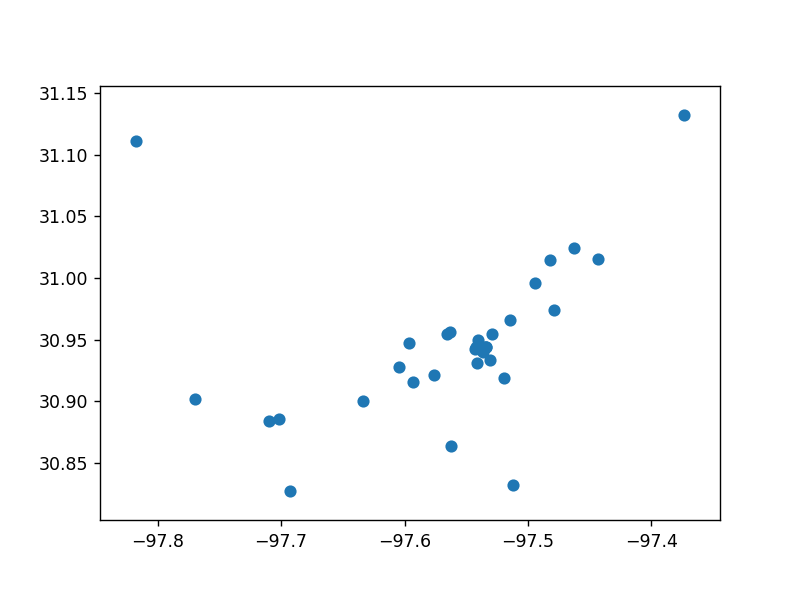

In [17]:
gdf.plot();